In [202]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cassandra.cluster import Cluster
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import pycountry
import plotly.express as px
sns.set()
plt.rcParams["figure.figsize"] = (20,10)

In [203]:
cluster = Cluster(['172.31.10.156', '172.31.10.119', '172.31.0.245','172.31.6.65','172.31.8.141'])
session = cluster.connect("nosql")

In [204]:
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
session.row_factory = pandas_factory
session.default_fetch_size = None

In [205]:


date = 20190325

**Requête 1**

In [206]:
def convertCountryName(c):
    if c=='Unknown':
        return "Unknown"
    country = pycountry.countries.get(alpha_2=c)
    if country is None:
        return "Unknown"
    else:
        return country.name

def convertCountryLanguage(c):   
    return pycountry.languages.get(alpha_3=c).name
query = "SELECT pays,langue, count from req1 where jour ="+str(date)
rslt = session.execute(query, timeout=None)
df = rslt._current_rows
df["count"] = pd.to_numeric(df["count"])
df = df.sort_values(by=['count'], ascending=False)
df["pays"] = df["pays"].apply(convertCountryName)
df["langue"] = df["langue"].apply(convertCountryLanguage)

<Figure size 1080x360 with 0 Axes>

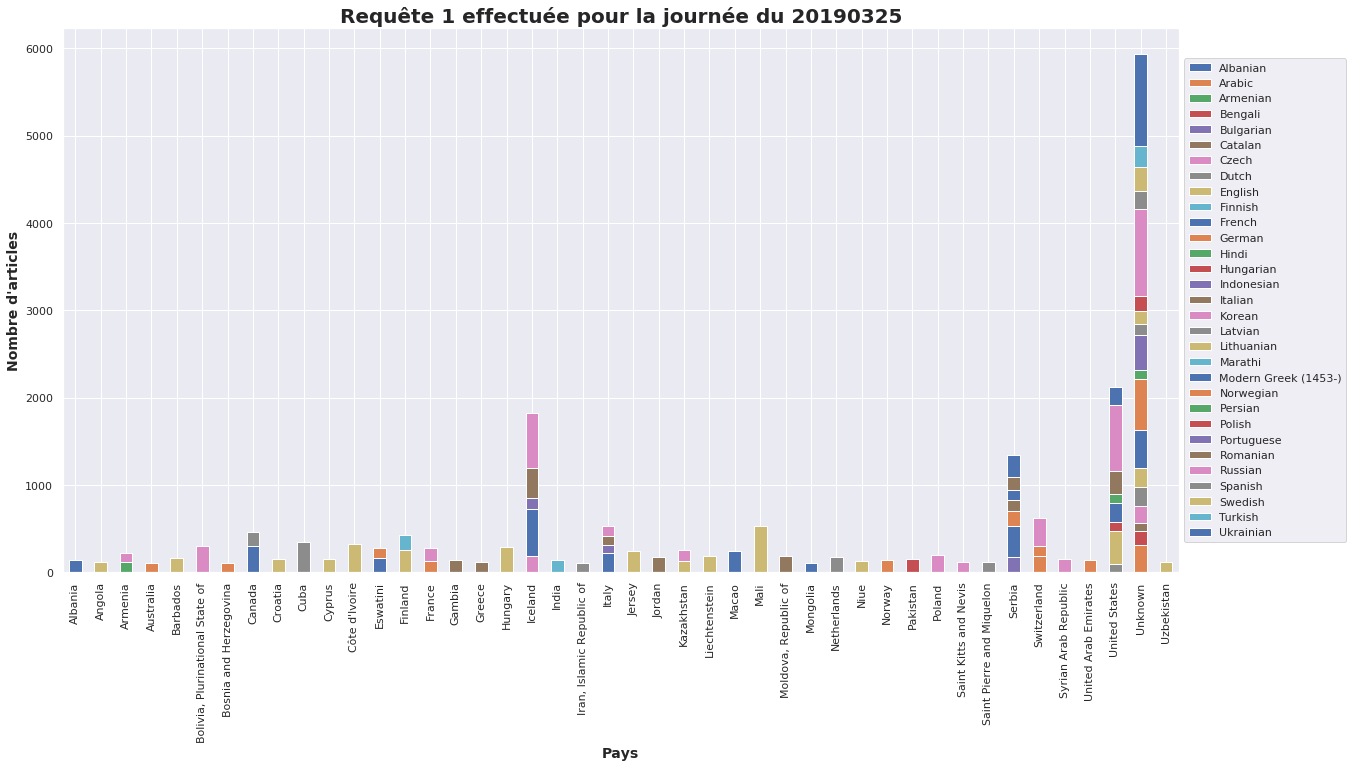

In [207]:
#plot
plt.figure(figsize=(15,5))
df_pivot = df[:100].pivot_table(index = 'pays', columns =  'langue', values ='count', aggfunc = 'sum')
df_pivot.plot(kind='bar', stacked=True)
plt.title(f"Requête 1 effectuée pour la journée du {date}", weight = 'bold').set_fontsize(20)
plt.ylabel("Nombre d'articles", weight = 'bold').set_fontsize(14)
plt.xlabel('Pays', weight = 'bold').set_fontsize(14)
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))

In [ ]:
df.head(10)